In [17]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
%matplotlib inline
import pickle
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#plt.style.use("dark_background")
sns.set_style('darkgrid')

In [2]:
def load_model(path='LDA model/lda.model'):
    return LdaModel.load(path)

In [3]:
def load_dictionary(path='dataframes/dictionary.gensim'):
    return Dictionary.load(path)

In [4]:
def load_corpus(path='dataframes/corpus.pkl'):
    with open(path, 'rb') as file:
        corpus = pickle.load(file)
    return corpus

In [5]:
def export_dataframe(dataframe, path, file_format='csv'):
    if file_format == 'csv':
        dataframe.to_csv(path, index=False)
    elif file_format == 'pkl':
        dataframe.to_pickle(path, index=False)

In [6]:
def import_dataframe(path):
    df = pd.DataFrame()
    
    if path.endswith('.csv'):
        df = pd.read_csv(path)
    elif path.endswith('.pkl'):
        df = pd.read_pickle(path)
        
    return df

## Load dictionary and corpus

In [7]:
dictionary = load_dictionary('dataframes/dictionary.gensim')
corpus = load_corpus('dataframes/corpus.pkl')

print('Number of unique tokens: {}'.format(len(dictionary)))
print('Number of documents: {}'.format(len(corpus)))

Number of unique tokens: 7037
Number of documents: 3889


## Load optimal LDA model

In [8]:
lda_model = load_model('LDA model/lda.model')
num_topics = lda_model.num_topics
print('Number of topics: {}'.format(num_topics))

Number of topics: 29


## Visualization

In [11]:
lda_model.show_topics(num_topics=num_topics, formatted = False)

[(0,
  [('agreement', 0.16270201),
   ('contract', 0.06462111),
   ('clause', 0.030065829),
   ('obligation', 0.02096816),
   ('enter', 0.014415533),
   ('letter', 0.014161335),
   ('breach', 0.014091665),
   ('negotiation', 0.011969451),
   ('bind', 0.0093242),
   ('contractual', 0.009298084)]),
 (1,
  [('business', 0.1210069),
   ('lease', 0.080585435),
   ('licence', 0.04511677),
   ('rent', 0.03968413),
   ('premise', 0.031029163),
   ('management', 0.026126156),
   ('operate', 0.017151156),
   ('hotel', 0.01594759),
   ('commercial', 0.015725797),
   ('shop', 0.015290564)]),
 (2,
  [('contravention', 0.048323147),
   ('penalty', 0.034575652),
   ('offence', 0.028683212),
   ('charge', 0.026472805),
   ('criminal', 0.017292812),
   ('breach', 0.017008929),
   ('impose', 0.015792783),
   ('declaration', 0.013053386),
   ('public', 0.011036977),
   ('contravene', 0.009868253)]),
 (3,
  [('word', 0.02006259),
   ('determination', 0.016825002),
   ('subsection', 0.013929121),
   ('stat

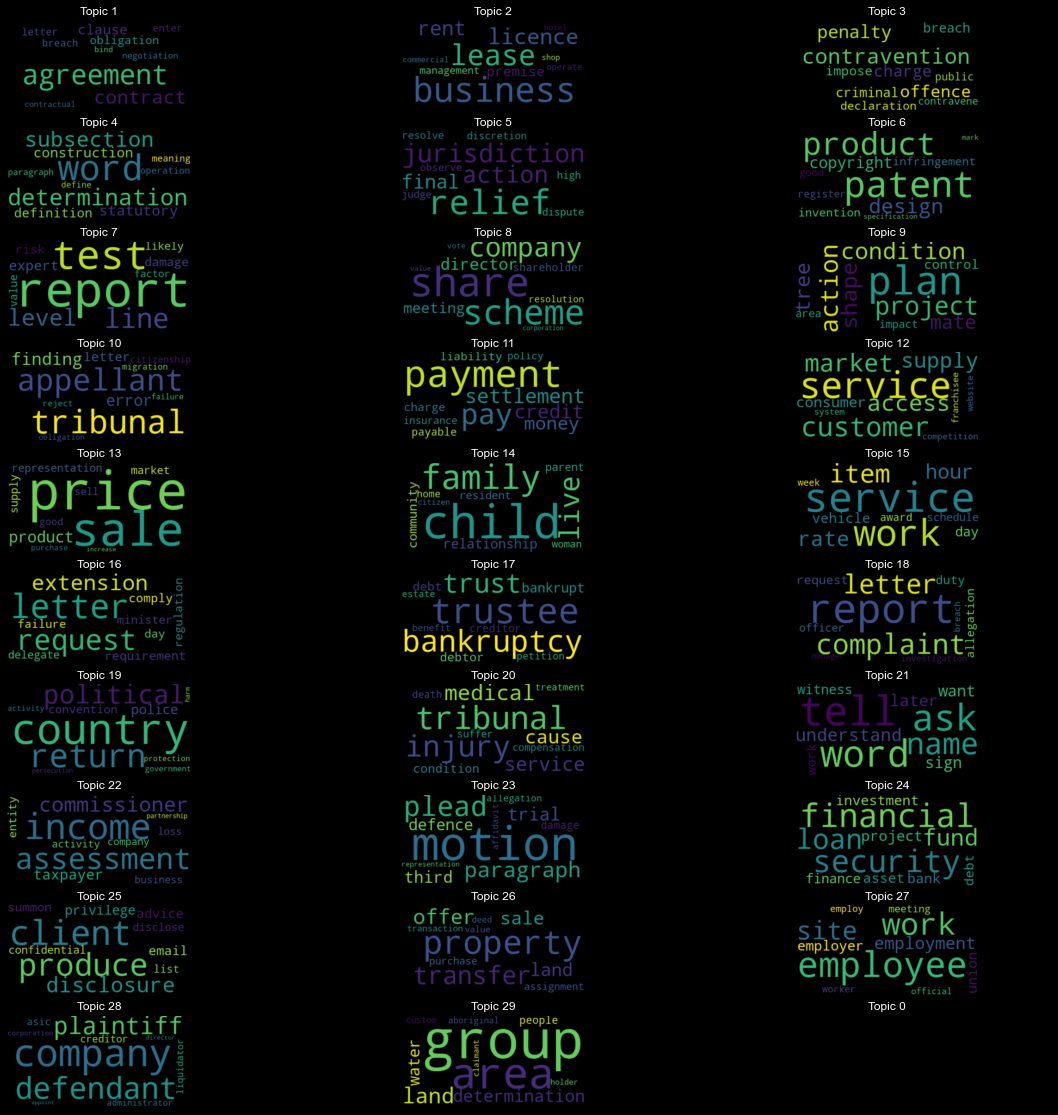

In [18]:
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted = False)

fig, axes = plt.subplots(10, 3, figsize=(20, 20), facecolor='black')

for i, ax in enumerate(axes.flatten()):
    ax.axis("off") 
    plt.gca().set_title("Topic {}".format(i), color = 'white')
    
    if i >= num_topics:
        break

    fig.add_subplot(ax)
    topic_keywords = dict(topics[i][1])

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=topic_keywords)
    
    ax.imshow(wordcloud, interpolation='bilinear')

plt.show()

### Plot number of documents in each topic

In [19]:
doc_topics_df = pd.read_csv('dataframes/topics_of_documents.csv')
doc_topics_df.head()

,dominant_topic,perc_contribution,topic_keywords,filename,text
0,4.0,0.3999,"relief, jurisdiction, action, final, dispute, ...",06_1.xml,background current application applicant holdi...
1,17.0,0.2325,"report, complaint, letter, request, duty, alle...",06_100.xml,application order review judicial_review conce...
2,24.0,0.3343,"client, produce, disclosure, privilege, advice...",06_1001.xml,notice motion file bring first second third ap...
3,0.0,0.1887,"agreement, contract, clause, obligation, enter...",06_1004.xml,introduction brand company know come marketing...
4,21.0,0.1860,"income, assessment, commissioner, taxpayer, en...",06_1005.xml,context present application appeal application...


Text(0, 0.5, 'Number of documents per topic')

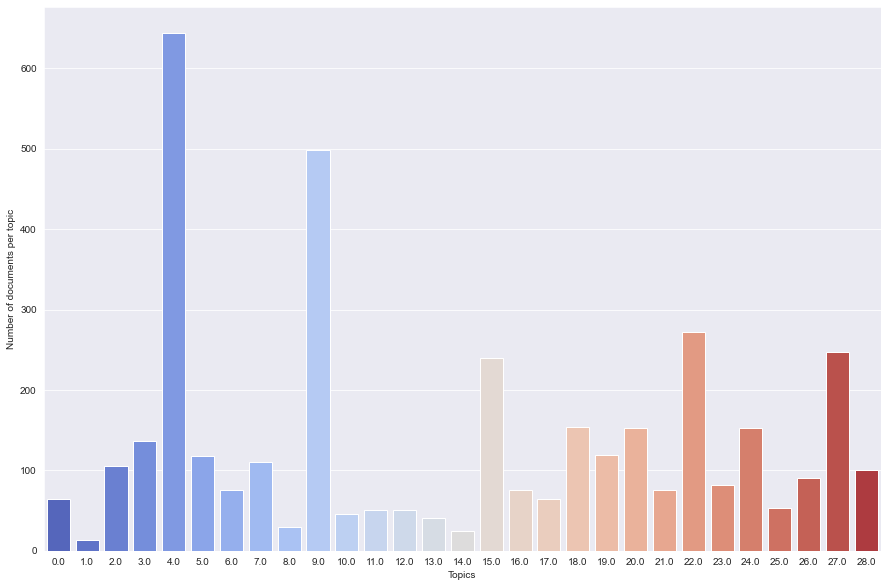

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(data=doc_topics_df, x='dominant_topic', palette='coolwarm')
plt.xlabel('Topics')
plt.ylabel('Number of documents per topic')

In [21]:
representative_docs_df = pd.read_csv('dataframes/representative_document_per_topic.csv')
representative_docs_df.head()

,topic,perc_contribution,topic_keywords,filename,text
0,0.0,0.5201,"agreement, contract, clause, obligation, enter...",07_136.xml,second respondent apply court order stay proce...
1,1.0,0.3789,"business, lease, licence, rent, premise, manag...",09_682.xml,introduction complex situate open comprise num...
2,2.0,0.5477,"contravention, penalty, offence, charge, crimi...",06_1732.xml,make application court various remedy arise al...
3,3.0,0.5816,"word, determination, subsection, statutory, co...",07_1004.xml,division migration regulation regulation speci...
4,4.0,0.6566,"relief, jurisdiction, action, final, dispute, ...",08_47.xml,motion present court seek application leave ap...


### Plot contribution of dominant topics in the most representative documents

Text(0, 0.5, 'Contribution of dominant topic in the most representative documents')

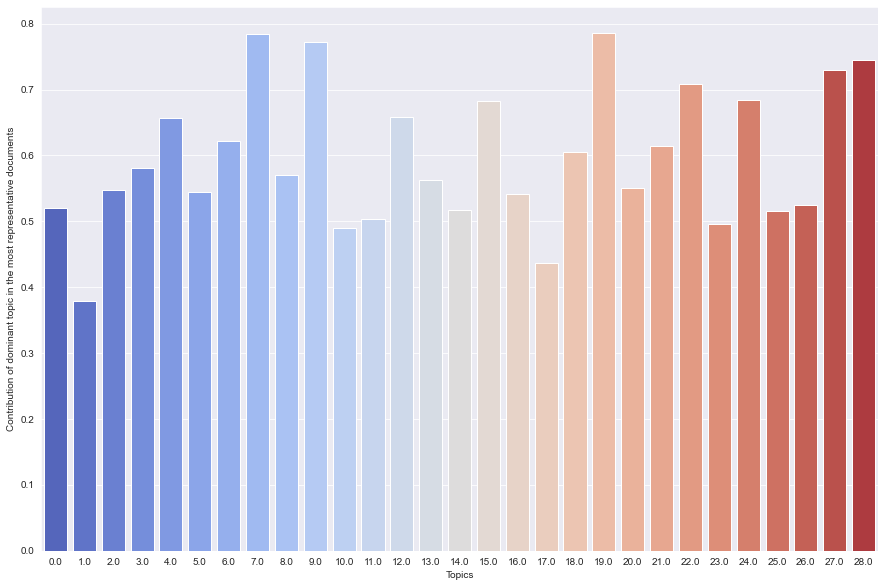

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='topic', y='perc_contribution', data=representative_docs_df, palette='coolwarm')
plt.xlabel('Topics')
plt.ylabel('Contribution of dominant topic in the most representative documents')

### Plot 10 words for each topic and total number of occurances of that word in that topic